In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
dataset_train.shape

(1258, 6)

In [8]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [12]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [14]:
X_train.shape

(1198, 60)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(1198, 60, 1)

In [19]:
modelo = Sequential()
modelo.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1))

In [20]:
modelo.compile(optimizer="adam", loss='mean_squared_error')
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)
modelo.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[es])

Epoch 1/500
38/38 [==============================] - 13s 17ms/step - loss: 0.0462
Epoch 2/500
38/38 [==============================] - 1s 18ms/step - loss: 0.0061
Epoch 3/500
38/38 [==============================] - 1s 18ms/step - loss: 0.0053
Epoch 4/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0061
Epoch 5/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 6/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 7/500
38/38 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 8/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 9/500
38/38 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 10/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 11/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 12/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0037
Epoch 13/500
38/38 [====

In [21]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [24]:
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
inputs = inputs.reshape(-1,1)
inputs

In [26]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = modelo.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


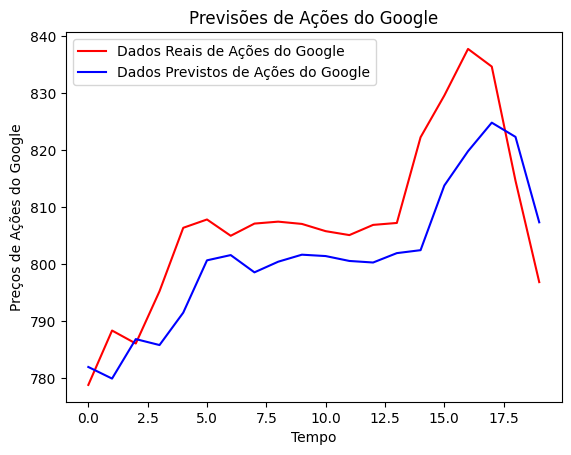

In [27]:
plt.plot(real_stock_price, color='red', label="Dados Reais de Ações do Google")
plt.plot(predicted_stock_price, color='blue', label="Dados Previstos de Ações do Google")
plt.title("Previsões de Ações do Google")
plt.xlabel("Tempo")
plt.ylabel("Preços de Ações do Google")
plt.legend()
plt.show()